In [1]:
import pandas as pd
import matplotlib.pyplot as plt

FileNotFoundError: [Errno 2] No such file or directory: 'data/cc.csv'

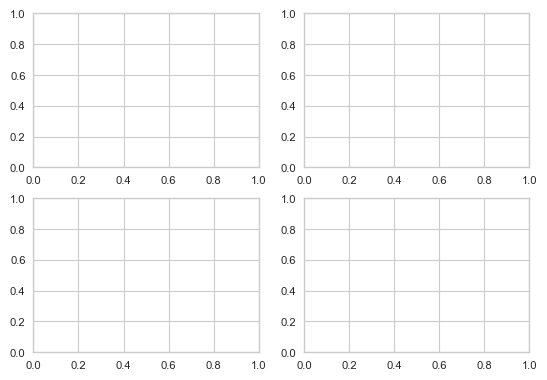

In [25]:
files = ["cc", "r2c", "l22", "l2c"]
plt.style.use("seaborn-v0_8-whitegrid")
fig, axs = plt.subplots(2, 2)


for i, file in enumerate(files):

    df = pd.read_csv("data/" + file + ".csv")


    df["nonwhite_ratio"] = df["nonwhite_low"] / df["nonwhite_high"]

    df["poverty_ratio"] = df["poverty_low"] / df["poverty_high"]

    df["income_ratio"] = df["income_high"] / df["income_low"]

    df["carless_ratio"] = df["carless_low"] / df["carless_high"]

    df["length_added_bikelanes"] /= 1000


    df = df[
        [
            "length_added_bikelanes",
            "number_cc",
            "overall_score",
            "nonwhite_ratio",
            "poverty_ratio",
            "income_ratio",
            "carless_ratio",
        ]
    ]


    df = df.rename(
        columns={
            "length_added_bikelanes": "Added Bike Lanes Length (km)",
            "overall_score": "Overall Bikeability",
            "nonwhite_ratio": "Nonwhite Inequity Ratio",
            "poverty_ratio": "Poverty Inequity Ratio",
            "income_ratio": "Income Inequity Ratio",
            "carless_ratio": "Carless Inequity Ratio",
        }
    )


    plt.style.use("seaborn-v0_8-whitegrid")

    if file == "l2c_strong":
        file = "Largest-to-Closest"
    elif file == "l22_strong":
        file = "Largest-to-Second"
    elif file == "cc_strong":
        file = "Closest Components"

    else:
        file = "Random-to-Closest "


    df.drop(["number_cc", "Overall Bikeability"], axis=1).plot(

        ax=axs[i // 2][i % 2],

        x="Added Bike Lanes Length (km)",
        title=file,

        sharey=True,

        sharex=True,

        legend=False,

        ylim=(0.25, 3.75),
    )
    if file == "Largest-to-Closest":

        handles, labels = axs[0][0].get_legend_handles_labels()

        unique_labels = [
            "Nonwhite Inequity Ratio",
            "Poverty Inequity Ratio",
            "Income Inequity Ratio",
            "Carless Inequity Ratio",
        ]

        unique_handles = [
            handle for handle, label in zip(handles, labels) if label in unique_labels
        ]

        fig.legend(
            handles=unique_handles,
            labels=unique_labels,
            loc="center",
            bbox_to_anchor=(0.5, -0.02),
            ncol=3,
            edgecolor="black",
        )

    plt.tight_layout()

    plt.savefig(file)

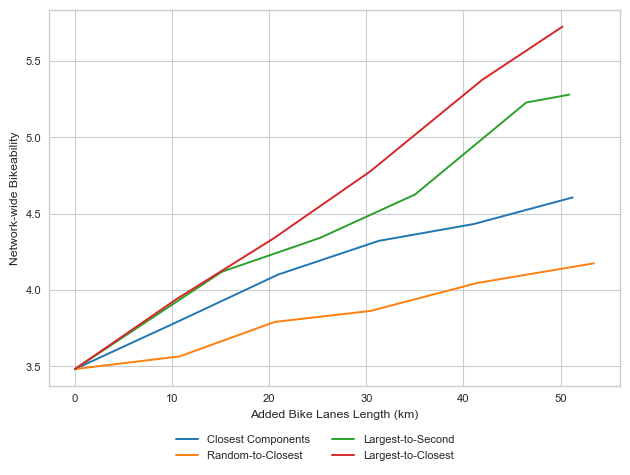

In [10]:
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots()
# plt.style.use('seaborn-v0_8-whitegrid')
for i, file in enumerate(files):
    df = pd.read_csv(file + ".csv")
    
    if file == 'l2c_strong': file = 'Largest-to-Closest'
    elif file == 'l22_strong': file = 'Largest-to-Second'
    elif file == 'cc_strong': file = 'Closest Components'
    else: file = 'Random-to-Closest '

    df['length_added_bikelanes'] /= 1000

    ax.plot(df['length_added_bikelanes'], df['overall_score'], label=file)

fig.legend(loc='center', bbox_to_anchor=(0.5, -.03), ncol=2)
ax.set_xlabel("Added Bike Lanes Length (km)")
ax.set_ylabel("Network-wide Bikeability")
plt.tight_layout()

In [12]:
files = ['l2c_strong', 'l22_strong', 'r2c_strong', 'cc_strong', ]
for file in files:
    print(file)
    df = pd.read_csv(file + ".csv")

    df['nonwhite_ratio'] = df['nonwhite_low'] / df['nonwhite_high']
    df['poverty_ratio'] = df['poverty_low'] / df['poverty_high']
    df['income_ratio'] = df['income_high'] / df['income_low']
    df['carless_ratio'] = df['carless_low'] / df['carless_high']
    df['length_added_bikelanes'] /= 1000

    df = df[['length_added_bikelanes', 'number_cc', 'overall_score', 'nonwhite_ratio',
                    'poverty_ratio', 'income_ratio', 'carless_ratio']]

    print((df.iloc[-1]['carless_ratio'] / df.iloc[0]['carless_ratio'] - 1) * 100)
    # print((df.iloc[-1]['nonwhite_ratio']))
    # print(df['length_added_bikelanes'])

l2c_strong
-64.54607493677102
l22_strong
22.444535464912676
r2c_strong
-4.622082292949226
cc_strong
-49.033946550162064


In [28]:
pd.read_csv('data/l22.csv')

,Unnamed: 0,length_added_bikelanes,number_cc,overall_score,nonwhite_high,nonwhite_low,poverty_high,poverty_low,income_high,income_low,carless_high,carless_low
0,0,0.000000,18,3.481880,3.367172,3.808703,2.318071,4.283296,4.505875,2.102802,2.081167,4.109593
1,0,15550.136297,81,4.171637,3.571749,4.159925,2.606930,5.051912,5.251371,2.304682,2.215803,5.080952
2,0,32373.361882,74,4.921363,3.667975,5.356818,2.800541,6.150531,6.741702,2.411293,2.397881,5.206958
3,0,43315.632877,64,5.359002,3.621625,6.065518,2.753955,6.544597,7.744972,2.391976,2.501171,5.288024
4,0,50596.420055,59,5.429974,3.654860,6.069593,2.751381,6.536270,7.745587,2.387234,2.502004,5.288131
